In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from resnets_utils import *
from keras.initializers import glorot_uniform
from keras.callbacks import EarlyStopping
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline
import pickle
import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)
import os
import cv2


In [2]:
x_train = pickle.load(open("x_train.pickle", "rb"))
y_train = pickle.load(open("y_train.pickle", "rb"))

In [3]:
x_train = x_train/255.0
x_train.shape

(12000, 64, 64, 3)

In [4]:
y_train.shape

(12000, 4)

In [5]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense
from keras.models import Sequential

In [6]:
def model():

SyntaxError: unexpected EOF while parsing (<ipython-input-6-09c0a6ae033f>, line 1)

In [7]:
model = Sequential()
# First convolutional layer accepts image input
model.add(Conv2D(4, kernel_size=5, padding = 'same', activation = 'relu', 
                 input_shape = (64,64,3)))
# Add a max pooling layer
model.add(MaxPooling2D(4))
# Add a convolutional layer
model.add(Conv2D(15, kernel_size=5, padding = 'same', activation='relu'))
# Add another max pooling layer
model.add(MaxPooling2D(4))
# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(4, activation='softmax'))

# Summarize the model
model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 4)         304       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 15)        1515      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 240)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 964       
Total params: 2,783
Trainable params: 2,783
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, 
                 validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 9600 samples, validate on 2400 samples
Epoch 1/10
9600/9600 [==============================] - 14s 1ms/step - loss: 0.9480 - acc: 0.6158 - val_loss: 0.5143 - val_acc: 0.8171
Epoch 2/10
9600/9600 [==============================] - 10s 1ms/step - loss: 0.3776 - acc: 0.8702 - val_loss: 0.2799 - val_acc: 0.9025
Epoch 3/10
9600/9600 [==============================] - 10s 1ms/step - loss: 0.2247 - acc: 0.9284 - val_loss: 0.2009 - val_acc: 0.9313
Epoch 4/10
9600/9600 [==============================] - 10s 1ms/step - loss: 0.1492 - acc: 0.9564 - val_loss: 0.1277 - val_acc: 0.9654
Epoch 5/10
9600/9600 [==============================] - 10s 1ms/step - loss: 0.1015 - acc: 0.9754 - val_loss: 0.0878 - val_acc: 0.9804
Epoch 6/10
9600/9600 [==============================] - 10s 1ms/step - loss: 0.0722 - acc: 0.9832 - val_loss: 0.0632 - val_acc: 0.9867
Epoch 7/10
9600/9600 [=========================

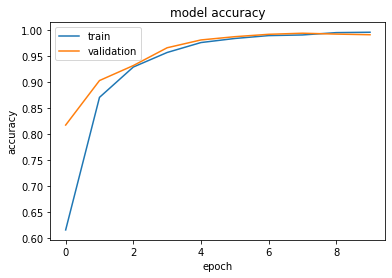

In [12]:
# Plotting Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

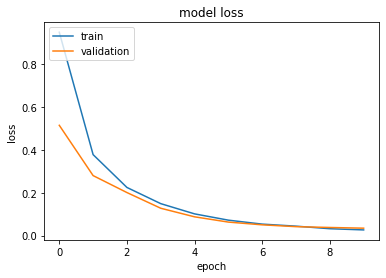

In [13]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Model Evaluation

In [14]:
DataDir_Test = "E:/asl_alphabet_test"

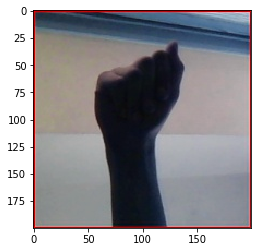

In [15]:
Categories = ["A", "B", "C", "D"]
for category in Categories:
    path = os.path.join(DataDir_Test, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        break
    break

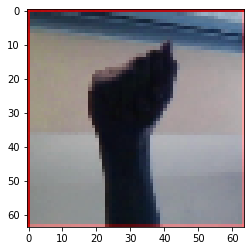

In [16]:
img_size = 64
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array)
plt.show()

In [17]:
test_data = []
def create_test_data():
    for category in Categories:
        path = os.path.join(DataDir_Test, category)
        class_num = Categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (img_size, img_size))
            test_data.append([new_array, class_num])
create_test_data()

In [18]:
x_test = []
y_test = []

for features, labels in test_data:
    x_test.append(features)
    y_test.append(labels)

In [19]:
x_test = np.asarray(x_test)
x_test = np.array(x_test).reshape(x_test.shape[0], img_size, img_size, 3)
print(x_test.shape)
y_test = np.array(y_test).reshape(-1, 1)
from keras.utils import np_utils

# One-hot encode the training labels
y_test = np_utils.to_categorical(y_test)
print(y_test.shape)

(1200, 64, 64, 3)
(1200, 4)


In [20]:
x_test = x_test/255.0

In [21]:
preds = model.evaluate(x_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1200/1200 [==============================] - 1s 482us/step
Loss = 0.1664278599190478
Test Accuracy = 0.9841666666666666
